In [1]:
# libs
from numba import set_num_threads
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython import display
# adjust this to your preference. at least one less than cpu cores is recommended,
# since numba code can't easily be interrupted and you might lock up your system if
# something goes wrong
set_num_threads(2)

# code
import randomwalk
import energy
import randomwalk_statistics

Example plot for ex. 1:

In [5]:
grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=100, steps=100)
while(coord_vec[-1].x == 0): # discard protein walks that got stuck
    grid, coord_vec = randomwalk.self_avoiding_walk_protein(dim=100, steps=100)
fig, ax = randomwalk.plot_protein(coord_vec, dim=30, path="")
plt.savefig('figures/ex1.png', dpi = 600, format = 'png')
fig.show()

<IPython.core.display.Javascript object>

Ex. 2:

In [6]:
fig, ax, eigenvalues, ev_mean, ev_std = energy.eigenvalue_statistics(runs=1000000, path="")
plt.savefig('figures/ex2.png', dpi = 600, format = 'png')
fig.show()

<IPython.core.display.Javascript object>

Ex. 3:

2261


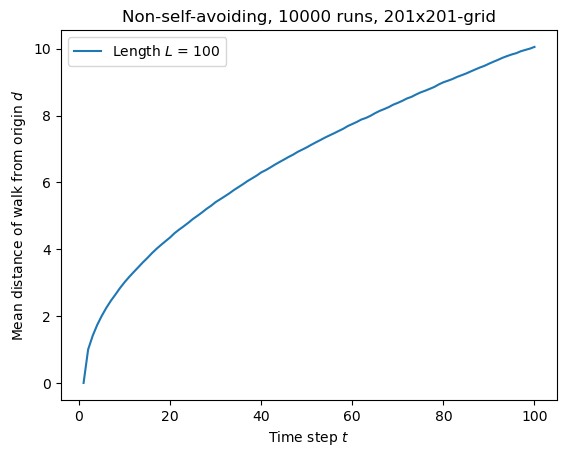

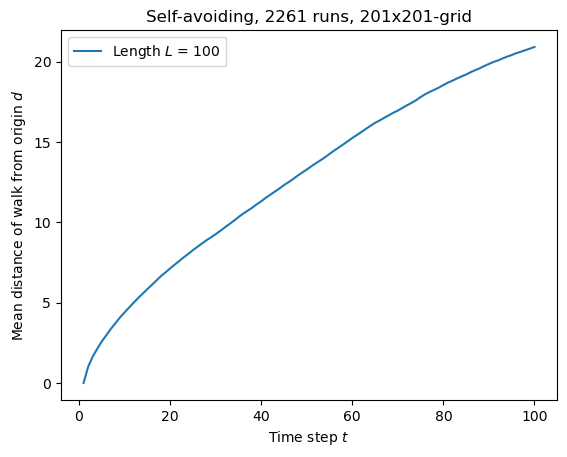

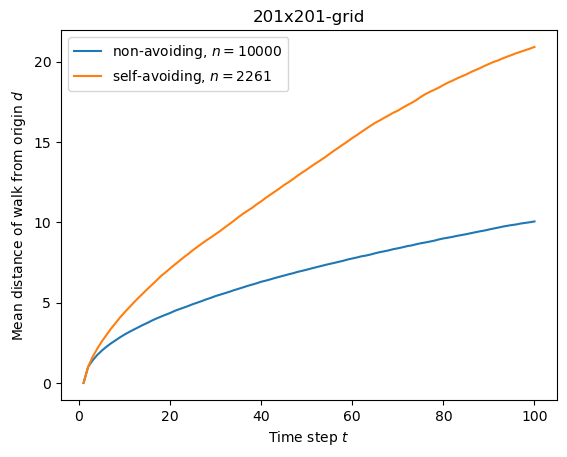

In [8]:
fig, ax, distance_r, distance_sa = randomwalk_statistics.mean_sq_pos_stats_both(10000, 100, 100, "")
fig.show()


Ex. 4:

In [9]:
#anim, fig, ax1, ax2, grids_vecs = energy.animated_monte_carlo(50, 100, 1, 1, 8, "data")
#vid = anim.to_html5_video()
#html = display.HTML(vid)
#display.display(html)
fig, ax, ergs, grid, coord_vec = energy.evolve_protein_plot_energy(length=100, mc_steps=1000, T=1, path="")
plt.savefig('figures/ex4.png', dpi = 600, format = 'png')
fig.show()

<IPython.core.display.Javascript object>

Please put stuff here that we can present: